 ## **Isabel (pfg224)** - Portfolio 3: SMK Api 


I denne portfolio vil der bruges SMKs Api til at udtrække noget data, og dernæst analysere det. Jeg vil bruge Jupyter Notebook for at besvare denne opgave.


**Opgave 1: Beskriv (med referencer) hvorfor institutionen har en API tilgang til deres datasæt, hvad det er blevet brugt til og/eller hvad de tænker det kunne bruges til?**

SMK, også kaldet Statens Museum for Kunst, er et af Danmarks mest kendte museer indenfor kunst og kultur. Trods sin fortræffelige udstilling af kunstværker, så får en gæst kun 0,7% af hele deres samling at se (https://www.smk.dk/article/smk-open/). Desuden er det ikke alle, der har mulighed for at besøge museet. Derfor har SMK arbejdet med at starte SMK Open, et projekt, der skal gøre museets samling tilgængelig for online besøgende. Med det in mente har de yderligere arbejdet på, at gæster også skal kunne *bruge* værkerne til eget brug, og dermed også åbnet deres egen Api online (https://www.smk.dk/article/smk-api/). I antropologien *Sharing is caring* uddyber Merete Sanderhoff SMKs vision med deling ud fra Wikinomics økonomiske paradigme, hvor det at dele viden og aktiver hjælper med, at:"*(...) alle kan bidrage til videreudviklingen og dermed sætte hastigheden af nye opdagelser og løsninger i vejret*" (Sanderhoff, 2014, s. 33-34). Ved at lave deres værker offentligt tilgængelige, ikke bare at se på, men også at kunne arbejde med dem, skaber en mulighed for at flere kan lave deres egne projekter med open data. 

----

**Opgave 2: Sammensæt en URL der søger efter kulturinstitutionens elementer (fx. genstande, kunstværker, personer, avisartikler, osv.) i APIen (gerne 100+ stk) med output i JSON. Load denne URL i en JSON beautifier og beskriv indholdet:** 

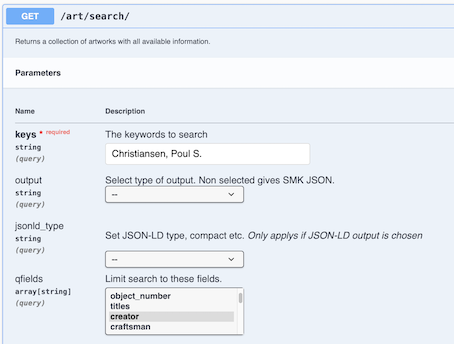

Inde i SMK's api valgte jeg at søge efter kunstneren Poul S. Christiansens værker, da der så ud til at være en del at finde, og næsten alle med billeder. Som ovenstående figur viser, så indeholdte min query kunsterens navn og qfields var "creator". Søgningen virkede, og gav følgende link:
https://api.smk.dk/api/v1/art/search/?keys=Christiansen%2C%20Poul%20S.&qfields=creator&offset=0&rows=10

URL'en i sig selv kan virke helt uoverskuelig, så derfor indsætter jeg URL'en i en JSON beautyfier. Jeg har brugt Code Beautify. 

**a) Hvilken typer metadata er der for hver element?**
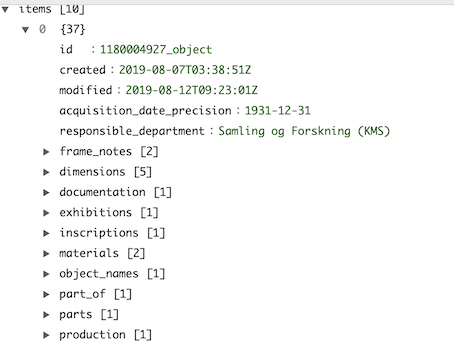

Til SMKs api findes der flere underkategorier, der yderligere også rummer indsnævringer af metadata. Et eksempel kunne være 'materials', der fortæller hvilke slags materialer værket er lavet ud af. Det første værk som er '1' under 'items', er f.eks. et lærred, og et oliemaleri. 'Dimensions' fortæller om højden og dybden af værket. Alle værker har yderligere et 'id', 'created', 'modified', 'acquisition_date_precision' og 'responsible_department'. Alle disse metadata termer fortæller om værket oprindelse inde på SMKs database, hvornår det blev malet og hvilken afdeling af SMK, der står for det. 

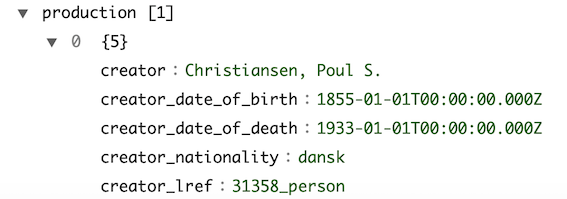

Det interessante ved ovenstående figur er al dataen om en kunster. Som tidligere nævnt, så har jeg valgt Poul S. Christiansen, og af metadata her kan vi se hans fødsels-, og dødsdato, samt nationalitet og et lref_person nr, som er en måde at kategorisere alle de kunstnere der er i systemet. 

-----

**b) Sammenlign metadata med Dublin Core. Er der overensstemmelse?**

I forhold til Dublin Core, som er en af de mest almindelige standarder for metadata og dokumentering af artikfakter, så er der mange ligheder. F.eks. kan 'creator' findes i både en af de 15 første DC standarder, og i SMKs Api med metadata. Og begge dækker over hvem der har skabt værket. Det samme gælder for 'title', som også er at finde og 'rights' der omhandler rettigheder for det pågældende værk. Der hvor de to standarder skilles er i deres funktion og titel. Altså her menes der, at DC er en standard der dækker over mange elementer og produkter som værker og bøger, hvor SMK udelukkende har at gøre med kunstværker. F.eks. har SMK mange metadata om malerier såsom 'colors', 'inscriptions', 'dimensions' etc. Alle disse har at gøre med deres malerier, og ville ikke give mening for en fysisk bog.

----

**c) Er der nogle tal der kan bruges til statistiske beregninger (fx. årstal)?**

Ja, f.eks. 'acquisition_date_precision', kan bruges til at lave en statistik over hvilke årstål Poul S. Christiansens værker er blevet fundet og indleveret til samlingen f.eks. via auktion. 'Techniques' kunne også bruges til at se hvilke malerier, der er lavet af hvilke slags materialer og redskaber. 


-----

**d) Hvilke slags spørgsmål kunne besvares gennem analyse af dette datasæt?
(gerne med eksempler)**

I hvilke årstal er kunsteren Poul S. Christiansens værker blevet fundet og indleveret til SMKs samling? Hvilke slags redskaber har kunsteren Poul S. Christiansen brugt til sine værker. Hvilke slags farver har kunsteren brugt til sine malerier, og passer det visuelt til hvad gæster kan finde online på SMKs hjemmeside?

----

**Opgave 3: Ved hjælp af Pandas og request, importer nu jeres valgte datasæt.**

In [1]:
#Allerførst importerer jeg de relevante biblioteker for at hente Api'en og beskrive den. 
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

api_search_url = 'https://api.smk.dk/api/v1/art/search/?keys=Christiansen%2C%20Poul%20S.&qfields=creator&offset=0&rows=10'

params = {
    'encoding': 'json', #formatet skal være json
    'n': 0
}

response = requests.get(api_search_url, params=params)

print(response)

<Response [200]>


 Ovenstående response kommando giver en tilbagemelding om udtrækningen af dataet var succesfuld. 

**a) Beskriv og rens datasættet.**

In [2]:
# retrieve the JSON from the response variable and add to the json variable
json = response.json()

#Laver json filen om til et dataframe via json_normalize
df = json_normalize(json['items'])

# Head funktionen tjekker de fem første kolonner i df
df.head()

,id,created,modified,acquisition_date_precision,responsible_department,frame_notes,dimensions,documentation,exhibitions,inscriptions,...,has_image,colors,production_dates_notes,notes,object_history_note,content_subject,related_objects,distinguishing_features,work_status,content_person
0,1180004927_object,2019-08-07T03:38:51Z,2019-08-12T09:23:01Z,1931-12-31,Samling og Forskning (KMS),"[Bagklædning: true, Mikroklimaramme: false]","[{'notes': '2012 x 1514 x 100 mm', 'part': 'br...","[{'title': 'Maleren Poul S. Christiansen', 'au...","[{'exhibition': 'ILD - kunst der fænger', 'dat...",[{'content': 'fntv: 19 PSC (monogram) 06-17 '}],...,True,"[#5A5A5A, #9B9B9B, #555555, #9B9B9B, #F4C6A3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1180005316_object,2019-08-07T03:40:00Z,2019-08-12T09:23:08Z,1937-12-31,Samling og Forskning (KMS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '585 x 445 mm', 'part': 'netto', 't...",NaN,NaN,[{'content': 'fnth: PSC (monogram) '}],...,True,"[#555555, #674200, #5A5A5A, #9B9B9B, #F4C6A3]",[ afsluttet: dokumenteret],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1180006228_object,2019-08-07T03:42:50Z,2019-08-12T09:23:26Z,1917-12-31,Samling og Forskning (KKS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '248 x 338 mm', 'part': 'bladmaal',...",NaN,NaN,[{'content': 'KKS (Lugt 1635)'}],...,True,"[#FFFFFF, #FFFFFF, #FFFFFF, #D2D2D2, #D2D2D2]",NaN,"[S. Danneskjold Samsøe, Fortegnelse over Maler...",[Erhvervet 1917 fra kunstneren],NaN,NaN,NaN,NaN,NaN
3,1180006399_object,2019-08-07T03:43:26Z,2019-08-08T08:33:18Z,1934-02-24,Samling og Forskning (KKS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '259 x 205 mm', 'part': 'bladmaal',...",NaN,NaN,[{'content': 'med blyant f.n.t.v. med monogram...,...,True,"[#F4C6A3, #D2D2D2, #D2D2D2, #F4C6A3, #555555]",NaN,NaN,"[Poul S. Christiansens Dødsboauktion, Winkel &...",[Settignano],"[{'title': 'Landskabsrids', 'reference': 'KKS1...",NaN,NaN,NaN
4,1180006959_object,2019-08-07T03:45:08Z,2019-08-12T09:23:41Z,1917-12-31,Samling og Forskning (KKS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '201 x 255 mm', 'part': 'bladmaal',...",NaN,NaN,"[{'content': 'med pen og sort blæk f.n.t.h.: ""...",...,True,"[#F4C6A3, #F4C6A3, #F4C6A3, #9B9B9B, #FFFFFF]",NaN,"[S. Danneskjold Samsøe, Fortegnelse over Maler...",[Erhvervet 1917 fra kunstneren],NaN,"[{'title': 'Rids af sejlbåde', 'reference': 'K...",NaN,NaN,NaN


**i) Hvilke data og datatyper er der?**

In [3]:
df.dtypes
#Finder ud af hvilke datatyper der er i dataframet

id                             object
created                        object
modified                       object
acquisition_date_precision     object
responsible_department         object
frame_notes                    object
dimensions                     object
documentation                  object
exhibitions                    object
inscriptions                   object
materials                      object
object_names                   object
part_of                        object
parts                          object
production                     object
production_date                object
techniques                     object
titles                         object
number_of_parts                 int64
object_number                  object
iiif_manifest                  object
public_domain                    bool
rights                         object
on_display                       bool
alternative_images             object
image_mime_type                object
image_iiif_i

Som tidligere nævnt, og som ovenstående output viser, så rummer dataen flere forskellige slags underkategorier under 'items', ud fra object, floats, integrers og boolske operatører. Og hvad rummer så betegnelserne? Titler på kunstværker, hvilke udstillinger de er at finde i, om de er public domain og hvilket år de er fra er nogle af dem. 

-----

**ii) Hvor mange kolonner og rækker?**

In [4]:
df.shape

(10, 45)

**iii) Er der kolonner I ikke skal bruge?**

Ja. Datatyperne viser et stor mængde af metadatatermer, mange som ikke er udfyldt, så for at få et mere 'rent' og overskueligt dataframe, så tager jeg nogle ud via *to drop*-funktionen:

In [5]:
to_drop = ['created',
          'modified',
          'frame_notes',
          'dimensions',
          'production_date',
          'techniques',
          'object_number',
          'part_of',
          'on_display',
          'responsible_department',
          'rights',
          'image_cropped',
          'image_orientation',
          'image_native',
          'image_height',
          'image_width',
          'image_iiif_id',
          'image_iiif_info', 
          'related_objects',
          'image_mime_type',
          'number_of_parts',
          'object_names', 
          'part_of',
          'parts',
          'object_history_note',
          'work_status']

In [6]:
# Skrives i to_drop funktionen
df.drop(to_drop, inplace=True, axis=1)
# Gense de 5 første kolonner
df.head()

,id,acquisition_date_precision,documentation,exhibitions,inscriptions,materials,production,titles,iiif_manifest,public_domain,alternative_images,image_size,image_thumbnail,has_image,colors,production_dates_notes,notes,content_subject,distinguishing_features,content_person
0,1180004927_object,1931-12-31,"[{'title': 'Maleren Poul S. Christiansen', 'au...","[{'exhibition': 'ILD - kunst der fænger', 'dat...",[{'content': 'fntv: 19 PSC (monogram) 06-17 '}],"[{'material': 'lærred'}, {'material': 'olie'}]","[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Prometheus raner ilden', 'language...",https://api.smk.dk/api/v1/iiif/manifest/?id=km...,True,"[{'mime_type': 'image/tiff', 'iiif_id': 'https...",31692288.0,https://iip.smk.dk/iiif/jp2/KMS3904.tif.recons...,True,"[#5A5A5A, #9B9B9B, #555555, #9B9B9B, #F4C6A3]",NaN,NaN,NaN,NaN,NaN
1,1180005316_object,1937-12-31,NaN,NaN,[{'content': 'fnth: PSC (monogram) '}],"[{'material': 'lærred'}, {'material': 'olie'}]","[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Blomsterbillede', 'language': 'da-...",https://api.smk.dk/api/v1/iiif/manifest/?id=km...,True,NaN,NaN,https://api.smk.dk/api/v1/thumbnail/3b321463-3...,True,"[#555555, #674200, #5A5A5A, #9B9B9B, #F4C6A3]",[ afsluttet: dokumenteret],NaN,NaN,NaN,NaN
2,1180006228_object,1917-12-31,NaN,NaN,[{'content': 'KKS (Lugt 1635)'}],NaN,"[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Brændinger i Middelhavet', 'langua...",https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,True,"[{'mime_type': 'image/tiff', 'iiif_id': 'https...",16489222.0,https://iip.smk.dk/iiif/jp2/pc4-14-04-2005_-_0...,True,"[#FFFFFF, #FFFFFF, #FFFFFF, #D2D2D2, #D2D2D2]",NaN,"[S. Danneskjold Samsøe, Fortegnelse over Maler...",NaN,NaN,NaN
3,1180006399_object,1934-02-24,NaN,NaN,[{'content': 'med blyant f.n.t.v. med monogram...,NaN,"[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Haveparti. Villa Linda, Settignano...",https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,True,NaN,24838307.0,https://iip.smk.dk/iiif/jp2/pc4_19-12-05____03...,True,"[#F4C6A3, #D2D2D2, #D2D2D2, #F4C6A3, #555555]",NaN,NaN,[Settignano],NaN,NaN
4,1180006959_object,1917-12-31,NaN,NaN,"[{'content': 'med pen og sort blæk f.n.t.h.: ""...",NaN,"[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Fra Taarnby', 'language': 'da-DK',...",https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,True,"[{'mime_type': 'image/tiff', 'iiif_id': 'https...",16563696.0,https://iip.smk.dk/iiif/jp2/pc4-14-04-2005_-_0...,True,"[#F4C6A3, #F4C6A3, #F4C6A3, #9B9B9B, #FFFFFF]",NaN,"[S. Danneskjold Samsøe, Fortegnelse over Maler...",NaN,NaN,NaN


**OBS:** Jeg ved ikke om det er API'en der driller, eller om det er noget andet, men gang på gang har ovenstående *to drop*-funktion ikke virket, selvom den gør det i f.eks. Spyder eller en ny Jupyter Notebook side. Hvis den af en eller anden grung ikke skulle virke igen vælger jeg at indsætte et screenshot af, hvordan det ser ud når det virker:

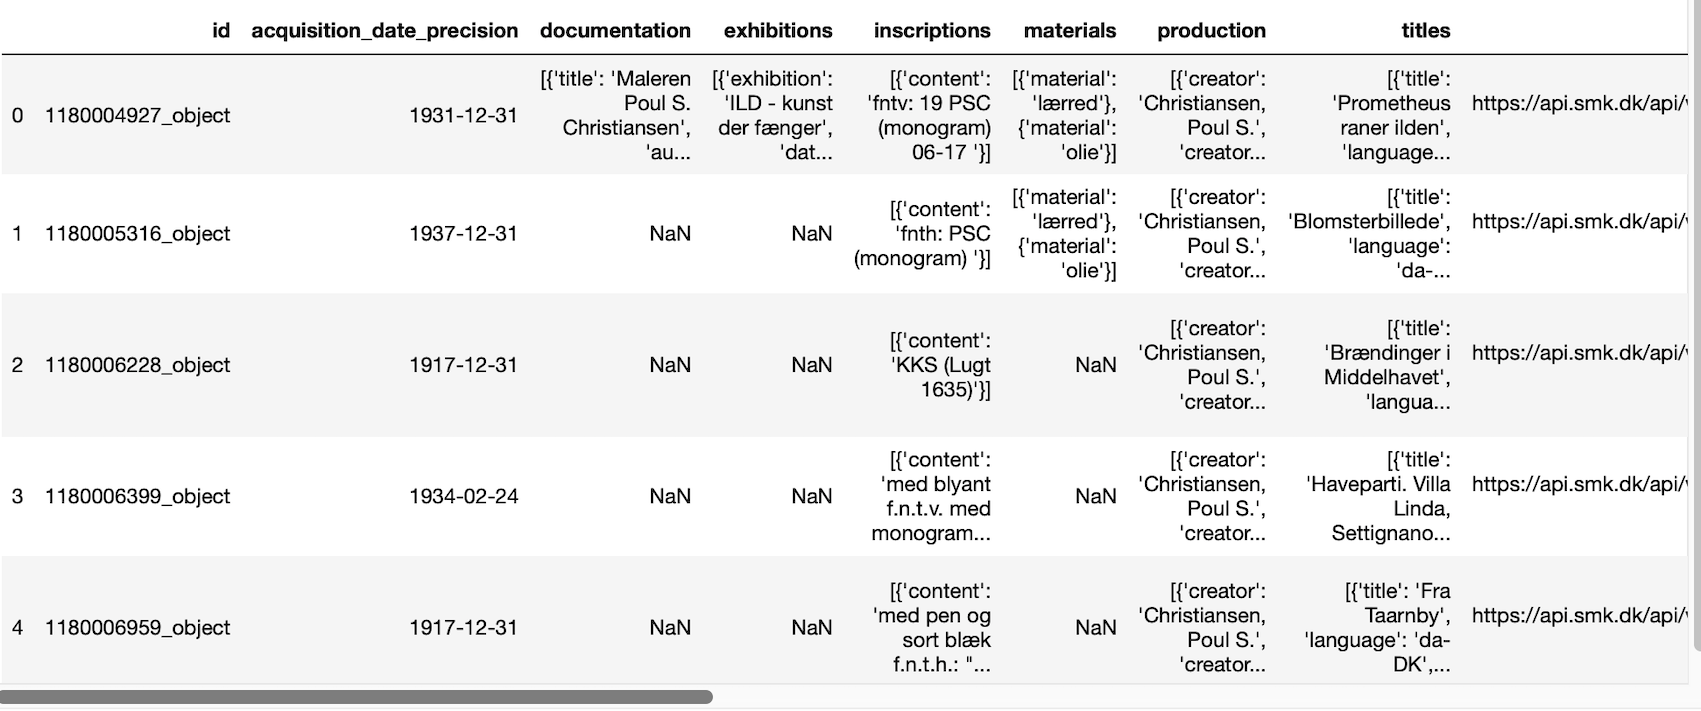

Jeg har renset datasættet og fjernet de fleste termer, der forstyrrer eller er i vejen. 

----

**Opgave 4 og 5: Lav nu udtræk og beregn på det data I har udvalgt. Hvilke informationer kan det give os om de udvalgte elementer? Brug value_counts() funktionen til at producere en dataframe over det udvalgte data, optælling og procent.**

Jeg kunne godt tænke mig at finde ud af hvilke år som værkerne af Poul S. Christiansen er fundet 'acquisition date' og opstille det på en pæn måde. 

In [7]:
#Udtrækker de første 4 numre fra values i data kolonnen, og tilføjer det til dataframet ved at lave year en string
year = df['acquisition_date_precision'].str.extract(r'^(\d{4})', expand=False)

#Tilføjer en kolonne kaldet year til dataframet og laver den numerisk.
df['year'] = pd.to_numeric(year)

#Head funktionen til at se første 5 kolonner af dataframet. For at se om det virker!
df.head()

,id,acquisition_date_precision,documentation,exhibitions,inscriptions,materials,production,titles,iiif_manifest,public_domain,...,image_size,image_thumbnail,has_image,colors,production_dates_notes,notes,content_subject,distinguishing_features,content_person,year
0,1180004927_object,1931-12-31,"[{'title': 'Maleren Poul S. Christiansen', 'au...","[{'exhibition': 'ILD - kunst der fænger', 'dat...",[{'content': 'fntv: 19 PSC (monogram) 06-17 '}],"[{'material': 'lærred'}, {'material': 'olie'}]","[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Prometheus raner ilden', 'language...",https://api.smk.dk/api/v1/iiif/manifest/?id=km...,True,...,31692288.0,https://iip.smk.dk/iiif/jp2/KMS3904.tif.recons...,True,"[#5A5A5A, #9B9B9B, #555555, #9B9B9B, #F4C6A3]",NaN,NaN,NaN,NaN,NaN,1931
1,1180005316_object,1937-12-31,NaN,NaN,[{'content': 'fnth: PSC (monogram) '}],"[{'material': 'lærred'}, {'material': 'olie'}]","[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Blomsterbillede', 'language': 'da-...",https://api.smk.dk/api/v1/iiif/manifest/?id=km...,True,...,NaN,https://api.smk.dk/api/v1/thumbnail/3b321463-3...,True,"[#555555, #674200, #5A5A5A, #9B9B9B, #F4C6A3]",[ afsluttet: dokumenteret],NaN,NaN,NaN,NaN,1937
2,1180006228_object,1917-12-31,NaN,NaN,[{'content': 'KKS (Lugt 1635)'}],NaN,"[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Brændinger i Middelhavet', 'langua...",https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,True,...,16489222.0,https://iip.smk.dk/iiif/jp2/pc4-14-04-2005_-_0...,True,"[#FFFFFF, #FFFFFF, #FFFFFF, #D2D2D2, #D2D2D2]",NaN,"[S. Danneskjold Samsøe, Fortegnelse over Maler...",NaN,NaN,NaN,1917
3,1180006399_object,1934-02-24,NaN,NaN,[{'content': 'med blyant f.n.t.v. med monogram...,NaN,"[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Haveparti. Villa Linda, Settignano...",https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,True,...,24838307.0,https://iip.smk.dk/iiif/jp2/pc4_19-12-05____03...,True,"[#F4C6A3, #D2D2D2, #D2D2D2, #F4C6A3, #555555]",NaN,NaN,[Settignano],NaN,NaN,1934
4,1180006959_object,1917-12-31,NaN,NaN,"[{'content': 'med pen og sort blæk f.n.t.h.: ""...",NaN,"[{'creator': 'Christiansen, Poul S.', 'creator...","[{'title': 'Fra Taarnby', 'language': 'da-DK',...",https://api.smk.dk/api/v1/iiif/manifest/?id=kk...,True,...,16563696.0,https://iip.smk.dk/iiif/jp2/pc4-14-04-2005_-_0...,True,"[#F4C6A3, #F4C6A3, #F4C6A3, #9B9B9B, #FFFFFF]",NaN,"[S. Danneskjold Samsøe, Fortegnelse over Maler...",NaN,NaN,NaN,1917


Jeg kan se at det har virket, og at der nu er tilføjet en year kategori til dataframet med alle årstallene. 

In [8]:
#Laver en ny dataframe kaldet df_year med hjælp af Pandas DataFrame
df_year = pd.DataFrame(year)
df_year.head()

,acquisition_date_precision
0,1931
1,1937
2,1917
3,1934
4,1917


Årstållene står der, men jeg vil gerne have at det bliver optalt, så man nemmere kan se det i en graf eller visualisering. Her vil jeg så bruge value_counts() til at optælle de diverse årstål: 

In [9]:
df_count = pd.DataFrame(df['year'].value_counts())

df_count.head()

,year
1934,3
1917,2
1931,2
1949,1
1947,1


Vi ser årstallene og de antal gange de er fundet, men jeg vil gerne have det i en fin rækkefølge, så jeg bruger sort_index funktionen:

In [10]:
#Bruger sort_index for at sortere efter række
df_count.sort_index(inplace=True)
df_count

,year
1917,2
1931,2
1934,3
1937,1
1947,1
1949,1


In [11]:
df_count.reset_index(inplace=True)
df_count

,index,year
0,1917,2
1,1931,2
2,1934,3
3,1937,1
4,1947,1
5,1949,1


Nu vil jeg gerne visualisere det data jeg har udtrækket og beregnet på. Her kan der bruges Altair biblioteket, der tillader grafer og andre former for visualiseringer i python. 

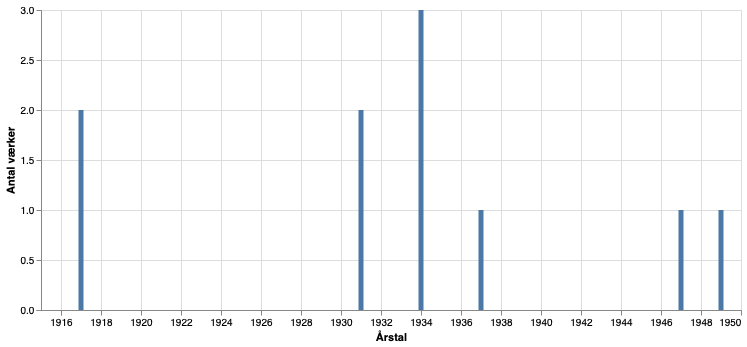

In [12]:
#Importerer altair biblioteket
import altair as alt
alt.renderers.enable('notebook') 

# Lav et line plot
alt.Chart(df_count).mark_bar(point=True).encode(
        #Årstal på X-aksen med Q for kvantitativ data og c format for uden decimal. 
        x=alt.X('index:Q', axis=alt.Axis(format='c', title='Årstal')),
    
        #Antal af kunstværker på Y-aksen med Q, der sikrer sig at det er kvantitativt
        y=alt.Y('year:Q', axis=alt.Axis(title='Antal værker')),
    
    #Bestem bredden og højden
    ).properties(width=700, height=300)

Diagrammet ovenfor viser antallet af kunstværker inddelt efter år af Poul S. Christiansen, som er i SMKs varetægt. Bemærk at det kun er de hvor data, hvor et årstal er angivet. Nogle af hans værker er markeret udateret og derfor ikke inkluderet her. 


**Farver på malerierne**

Et andet interessant punkt at undersøge er hvilke farver maler Poul S. Christiansen med. Ud fra et hurtigt kig på SMKs åbne samling online kan jeg se nogle matte og mørke farver, så jeg har en hypotese om, at hvis dataen er indtastet korrekt til deres API, så vil den stemme overens med hjemmesiden. Dette vil jeg undersøge med et kig på farverne, og dernæst en visualisering af farverne. 

In [13]:
#Undersøger hvilke farver datasættet har
df['colors']

0    [#5A5A5A, #9B9B9B, #555555, #9B9B9B, #F4C6A3]
1    [#555555, #674200, #5A5A5A, #9B9B9B, #F4C6A3]
2    [#FFFFFF, #FFFFFF, #FFFFFF, #D2D2D2, #D2D2D2]
3    [#F4C6A3, #D2D2D2, #D2D2D2, #F4C6A3, #555555]
4    [#F4C6A3, #F4C6A3, #F4C6A3, #9B9B9B, #FFFFFF]
5    [#D2D2D2, #D2D2D2, #D2D2D2, #9B9B9B, #555555]
6    [#D2D2D2, #D2D2D2, #9B9B9B, #9B9B9B, #5A5A5A]
7    [#F4C6A3, #555555, #9B9B9B, #5A5A5A, #FFFFFF]
8    [#9B9B9B, #9B9B9B, #5A5A5A, #9B9B9B, #555555]
9    [#F4C6A3, #9B9B9B, #FFFFFF, #5A5A5A, #555555]
Name: colors, dtype: object

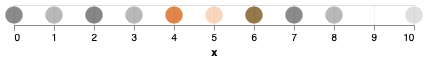

In [14]:
#Importerer de nødvendige biblioteker
import pandas as pd
import altair as alt

farver = pd.DataFrame({
    'x': range(11), #Gælder for alle de forskellige farver fra datasættet
    'color': ['#5A5A5A', '#9B9B9B', '#555555', '#9B9B9B', '#D35400', '#F4C6A3', '#674200', '#5A5A5A', '#9B9B9B', '#FFFFFF', '#D2D2D2']
})

alt.Chart(farver).mark_point(
    filled=True,
    size=300
).encode(
    x='x',
    color=alt.Color('color', scale=None)
)

Hypotesen ser ud til at være korrekt, og det kan konluderes at de værker SMK har af Poul S. Christiansen har samme farver, som både API'en og deres åbne samling online viser. 

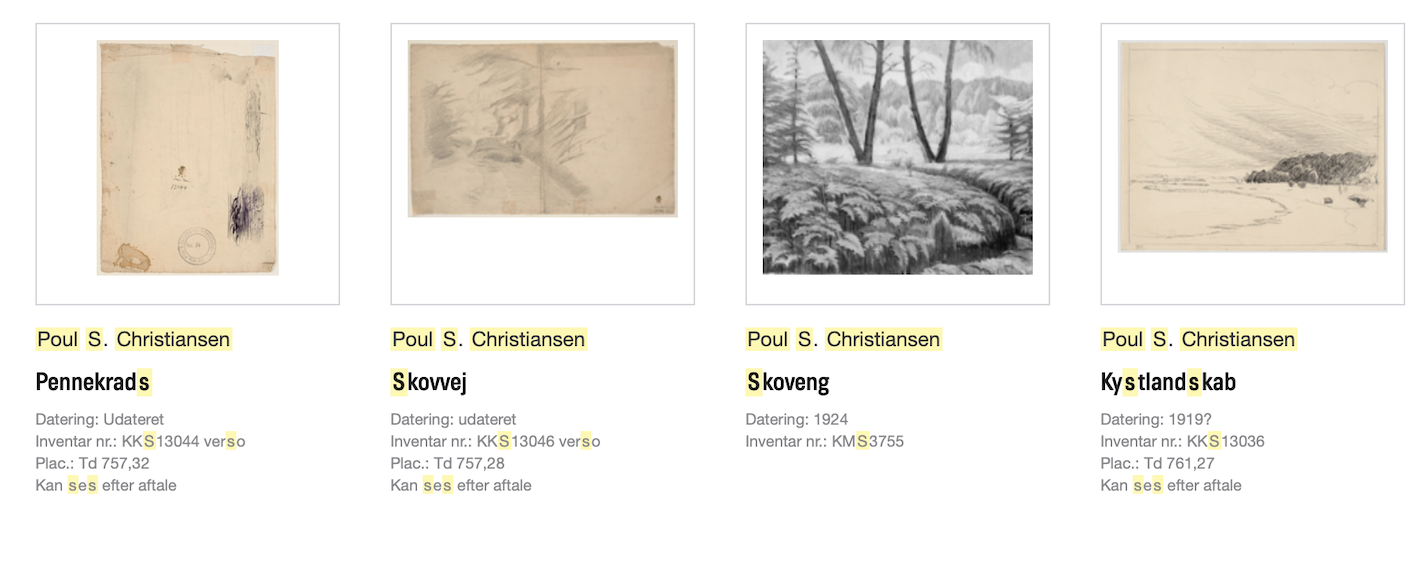

Ovenstående figur viser hvordan malerierne passer i farven til "farver" grafen. 


**Litteraturliste:**

Sanderhoff, M. (2014). *Sharing is caring*. Statens Museum for Kunst. 

SMK Open. Hentet fra Statens Museum for Kunst: https://www.smk.dk/article/smk-open/

SMK's API (beta-version). Hentet fra Statens Museum for Kunst: https://www.smk.dk/article/smk-api/
